University of Helsinki, Master's Programme in Data Science  
DATA16001 Network Analysis - Spring 2025  
Michail Mathioudakis  

# Assignment: Node classification (due on March 4)


For this assignment, you will generate node embeddings for some networks, and use the embeddings and other node attributes to train ML models and predict node labels.

Download the three networks from [the course repository](https://version.helsinki.fi/ads/data16001/-/tree/main/Data/node_classification?ref_type=heads). Each network dataset is stored over three files:

- File `network_<*number*>_A.pkl` contains the network graph $(G = (V, E))$, with $(n = |V|)$, in the form of the adjacency matrix $(A \in \{0,1\}^{n \times n})$.
- File `network_<*number*>_X.pkl` contains the node attributes as a matrix $(X \in \mathbb{R}^{n \times 2})$.
- File `network_<*number*>_Y.pkl` contains the node labels $(Y \in \{0,1,2,3\}^n)$.

### Part a)

**Compute** the Laplacian matrix $L = D − A$ for each network graph, where $D$ is the degree diagonal matrix. Subsequently, compute the Laplacian eigenvectors $u_2$ and $u_3$ corresponding to the second and third smallest (in magnitude) eigenvalues of the Laplacian, respectively. *Tip*: You are free to use any method for this, but you may find [scipy.sparse.linalg.eigsh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html) useful.

Notes:

- The i-th row of A, X, and Y corresponds to the same node i
- As stored in the files, the adjacency matrix A contains a self-loop for each node, which should be removed before answering the questions below. See the data_load.py script in the same repository directory for the suggested way to load the data.

In [2]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
filepath = "Data/node_classification/"
A1 = np.load(f"{filepath}/network_1_A.pkl",allow_pickle=True).astype("float")
A1 = A1 - np.eye(A1.shape[0])
X1 = np.load(f"{filepath}/network_1_X.pkl",allow_pickle=True).astype("float")
Y1 = np.load(f"{filepath}/network_1_Y.pkl",allow_pickle=True).astype(int)

In [4]:
A2 = np.load(f"{filepath}/network_2_A.pkl",allow_pickle=True).astype("float")
A2 = A2 - np.eye(A2.shape[0])
X2 = np.load(f"{filepath}/network_2_X.pkl",allow_pickle=True).astype("float")
Y2 = np.load(f"{filepath}/network_2_Y.pkl",allow_pickle=True).astype(int)

In [5]:
A3 = np.load(f"{filepath}/network_3_A.pkl",allow_pickle=True).astype("float")
A3 = A3 - np.eye(A3.shape[0])
X3 = np.load(f"{filepath}/network_3_X.pkl",allow_pickle=True).astype("float")
Y3 = np.load(f"{filepath}/network_3_Y.pkl",allow_pickle=True).astype(int)

In [6]:
G1 = nx.from_numpy_array(A1)
L1 = nx.laplacian_matrix(G1).toarray()
w1, v1 = sp.sparse.linalg.eigsh(L1, k=3, which='SM') # already sorted in ascending order

v1_u2 = v1[:, 1] 
v1_u3 = v1[:, 2] 

U1 = np.column_stack([v1_u2, v1_u3])

G2 = nx.from_numpy_array(A2)
L2 = nx.laplacian_matrix(G2).toarray()
w2, v2 = sp.sparse.linalg.eigsh(L2, k=3, which='SM') # already sorted in ascending order

v2_u2 = v2[:, 1] 
v2_u3 = v2[:, 2] 

U2 = np.column_stack([v2_u2, v2_u3])

G3 = nx.from_numpy_array(A3)
L3 = nx.laplacian_matrix(G3).toarray()
w3, v3 = sp.sparse.linalg.eigsh(L3, k=3, which='SM') # already sorted in ascending order

v3_u2 = v3[:, 1] 
v3_u3 = v3[:, 2] 

U3 = np.column_stack([v3_u2, v3_u3])

### Part b)

For each network, draw one figure with 2 subplots. Each subplot should be a two-dimensional scatter plot that contains one point (dot) for each node. For the first subplot, the two axes correspond to the two node attributes X. For the second subplot, the two axes correspond to the two eigenvectors $U =(u_2,u_3)$ (i.e., the two-dimensional spectral embedding). Color the points with different colors, according to the corresponding labels Y.

Attach your figure files (do not place them in the text box).

Briefly comment on the distributions of the visualized quantities: Do the values of X and U differ significantly for different nodes? Are different values of X and U clearly associated with different labels Y?

In [7]:
X_list = [X1, X2, X3]
Y_list = [Y1, Y2, Y3]
U_list = [U1, U2, U3] 
graph_list = [G1, G2, G3]
graph_names = ["Graph 1", "Graph 2", "Graph 3"]

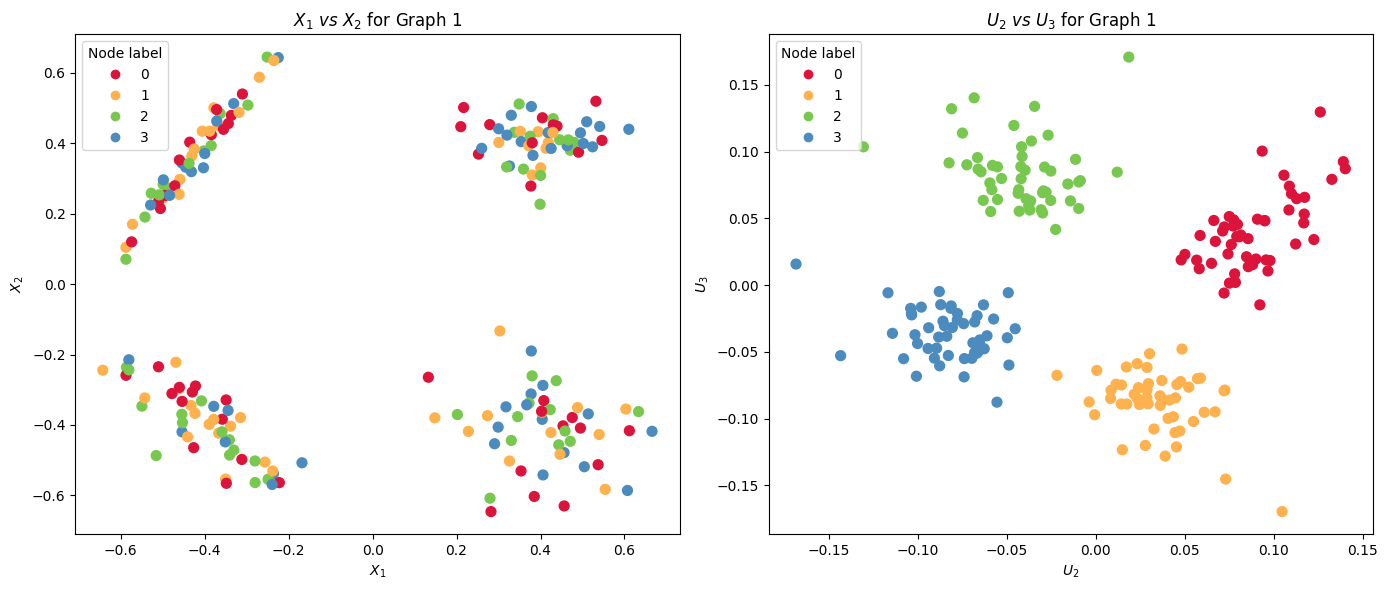

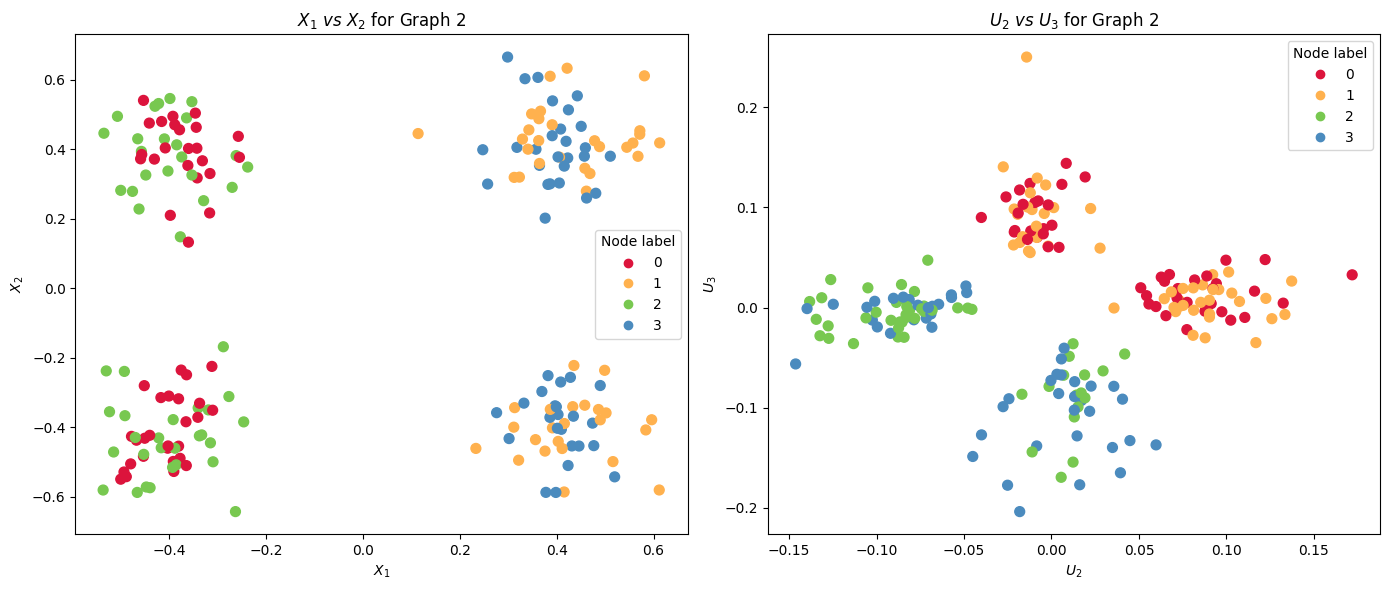

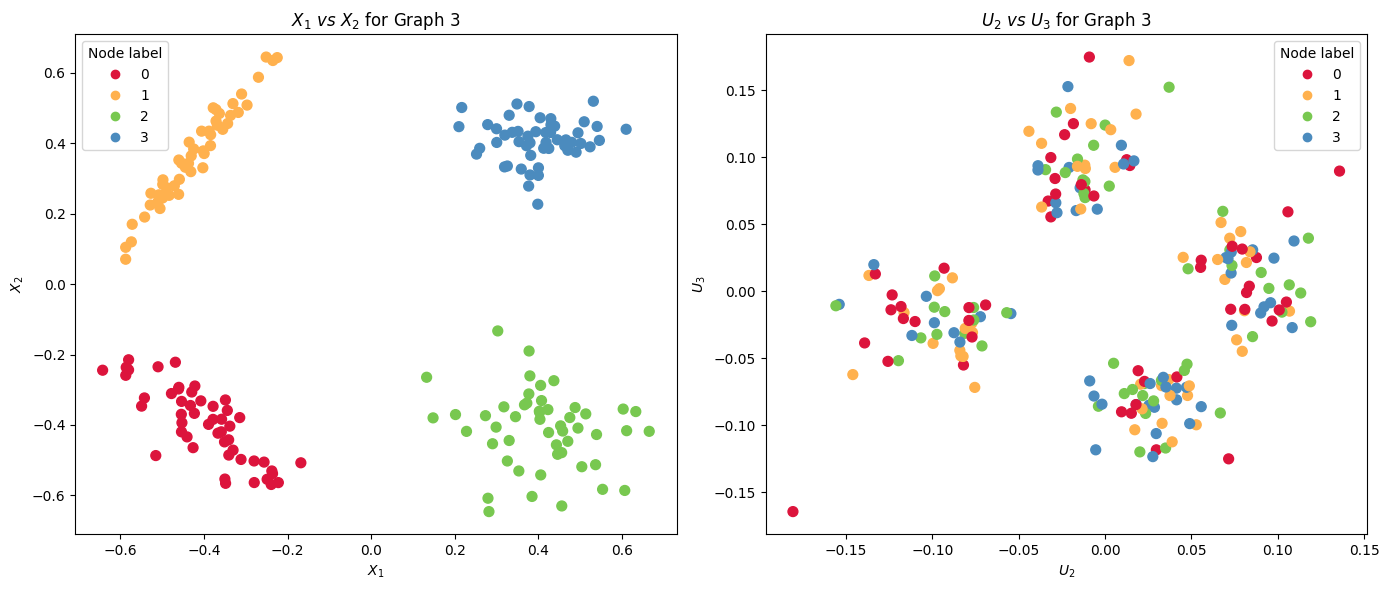

In [8]:
for graph_name, X, Y, U in zip(graph_names, X_list, Y_list, U_list):
	color_map = {0: '#DC143C', 1: '#FFB14E', 2: '#78C850', 3: "#4B8BBE"}
	cmap = mcolors.ListedColormap([color_map[l] for l in np.unique(Y)])
	
	fig, axs = plt.subplots(1, 2, figsize=(14, 6))
	scatter1 = axs[0].scatter(X[:, 0], X[:, 1], c = Y, cmap = cmap, s = 50)
	axs[0].set_title(r"$X_1\ vs\ X_2$" + " " + f"for {graph_name}")
	axs[0].set_xlabel(r"$X_1$")
	axs[0].set_ylabel(r"$X_2$")
	handles, _ = scatter1.legend_elements()
	axs[0].legend(handles, [f"{l}" for l in np.unique(Y)], title = "Node label")

	scatter2 = axs[1].scatter(U[:, 0], U[:, 1], c = Y, cmap = cmap, s = 50)
	axs[1].set_title(r"$U_2\ vs\ U_3$" + " " + f"for {graph_name}")
	axs[1].set_xlabel(r"$U_2$")
	axs[1].set_ylabel(r"$U_3$")
	handles2, _ = scatter2.legend_elements()
	axs[1].legend(handles2, [f"{l}" for l in np.unique(Y)], title = "Node label")

	plt.tight_layout()
	plt.show()


### Anwer

**Attribute plots**: Graph 1 and Graph 3 present a very similar behavior with nodes clustering into four subgroups in two dimensions but the two graphs differ significantly when we observe each subgroup individually, in particular each cluster of Graph 3 is isolated, containing only a single label, suggesting that a classification model could perform significantly well on the attributes of Graph 3. On the other hand all subgroups of Graph 1 contain a mix of all labels. Lastly Graph 2 is split in 2 subgroups and each of them is comprised of only 2 labels. Again as for Graph 3 this can imply a good classification accuracy from a classification model but not as much as for Graph 3.

**Spectral embedding plots**: here Graph 1 displays a very similar behavior as seen previously in the attributes plot of Graph 3 where all nodes labels are separated in 4 different regions making the classification task easier. As for Graph 2 the same behavior seen in the attributes plot can be seen in the spectral embedding plot but now the combination of labels are different, before it was {0, 2} and {1, 3} and now {0, 1} and {2, 3} this means that a dataset combining both attribute and spectral embedding could make the classification task easier. Graph 3 on the other hand displays a behavior seen earlier in the attributes plot of Graph 1 (4 different clusters comprised of all labels).

**In conclusion**, across all graphs, the attribute and spectral embedding plots display similar clustering patterns, with four distinct groups and x and y values concentrated around zero, although the spectral embedding values tend to be smaller. However, the differences highlighted above should be considered when interpreting classification tasks.

### Part c)

Using NetworkX and Matplotlib, visualize the networks using the spectral and spring layouts. For each network, return one figure with one subplot for each layout.

Briefly compare the resulting visualizations  with the distribution of the spectral embedding $U = (u_2, u_3)$, which you visualized earlier.

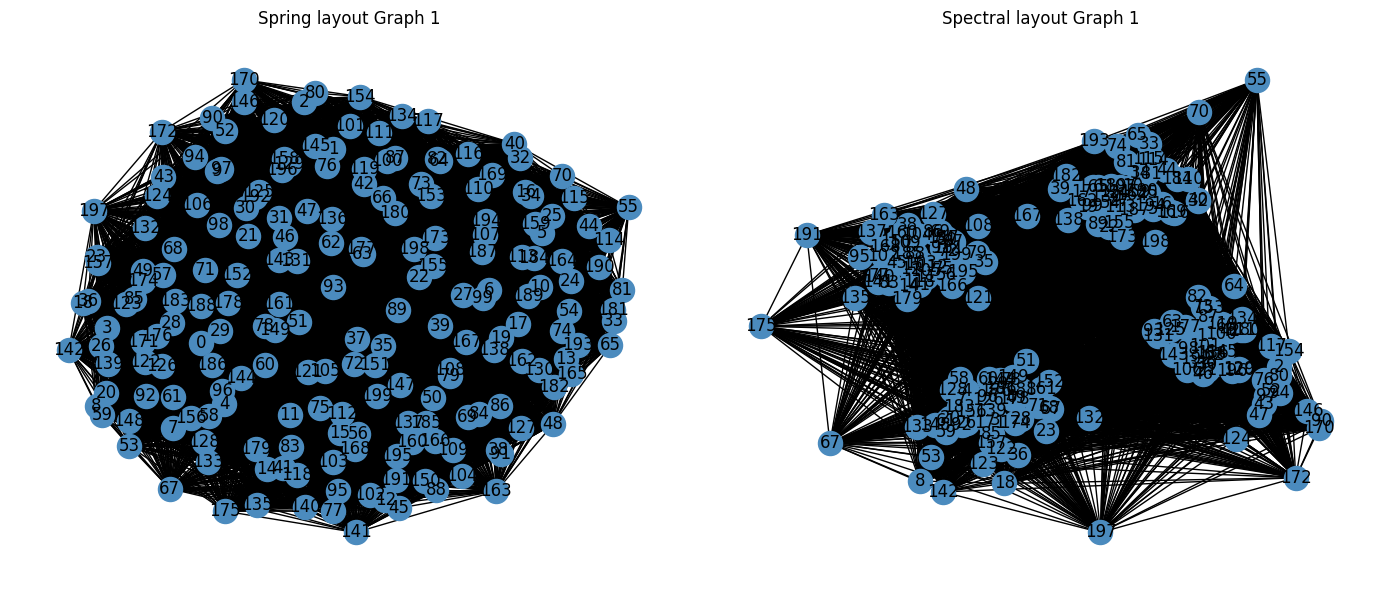

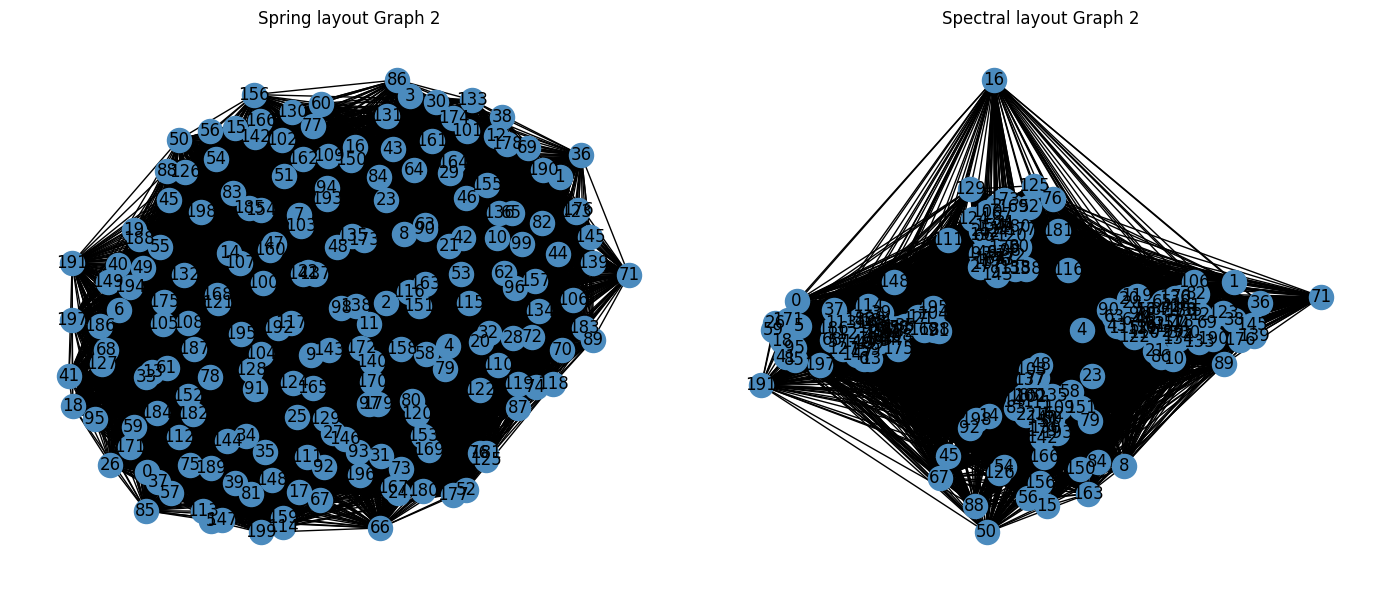

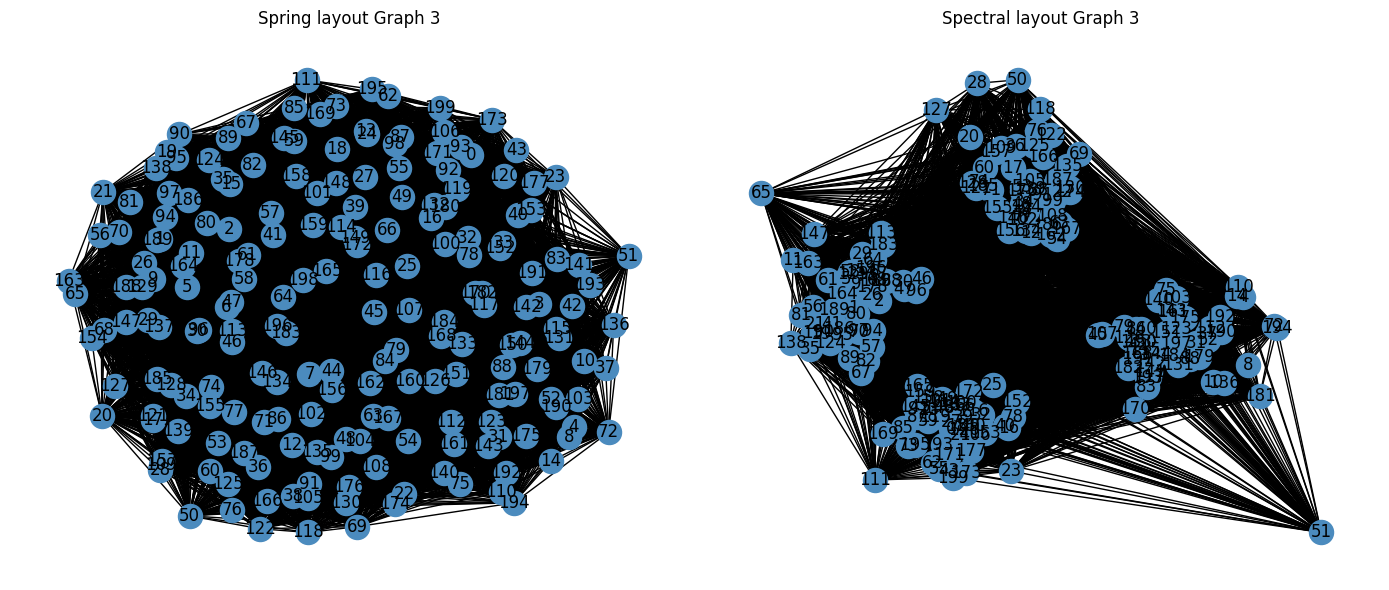

In [9]:
for graph, graph_name in zip(graph_list, graph_names):
	fig, axs = plt.subplots(1, 2, figsize=(14, 6))
	pos = nx.spring_layout(graph, seed = 12)
	nx.draw(graph, pos, ax=axs[0], node_color="#4B8BBE", with_labels = True, )
	axs[0].set_title(f"Spring layout {graph_name}")
	
	pos = nx.spectral_layout(graph)
	nx.draw(graph, pos, ax=axs[1], node_color="#4B8BBE", with_labels = True)
	axs[1].set_title(f"Spectral layout {graph_name}")

	plt.tight_layout()
	plt.show()

### Anwer

If we compare the **spectral layout** obtained through NetworkX and the **spectral embedding** plots it can be noticed that overall the plots are very similar, in particular the spectral layout manages to capture both the clusters found in the spectral embedding plot and the nodes that are distant from the centroids (see node 51 of Graph 3, and nodes 28, 50, 127 of Graph 3). This is to be expected since the spectral layout is derived from the eigenvalues of the Laplacian matrix. 
On the other hand the **spring layout** does not resemble any plot seen before.

### Part d)

For each network, train five Random Forest models to predict node label Y, with each model using a different set of node features. Specifically, use the following five sets of node features:

1. $[u_2]$
2. $[u_3]$
3. $[u_2,u_3]$
4. $[X]$
5. $[X, u_2,u_3]$

For each network, use a random 80% of the nodes for training and the remaining 20% for testing -- however, make sure to use the same train-test split for each of the five models.

For each network, report the resulting model performance with one barplot, where the horizontal axis corresponds to the five models, and the vertical axis to the classification accuracy on the test set. 

Compare the performance between the models: Which feature sets lead to better model performance? Are the spectral coordinates helpful in improving model performance compared to using node attributes alone? Is the observed model performance in line with your earlier observations about the distributions of node attributes, embedding, and labels?

In [10]:
accuracies = list()

for idx, _ in enumerate(graph_list):
	X_trains = [U_list[idx][:, 0].reshape(-1, 1), U_list[idx][:, 1].reshape(-1, 1), U_list[idx], X_list[idx], np.hstack([ X_list[idx], U_list[idx] ])]
	y = Y_list[idx]
	for X in X_trains:
		X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)
		model = RandomForestClassifier()
		model.fit(X_train, y_train)
		pred = model.predict(X_test)
		test_acc = accuracy_score(y_test, pred)
		accuracies.append(test_acc)

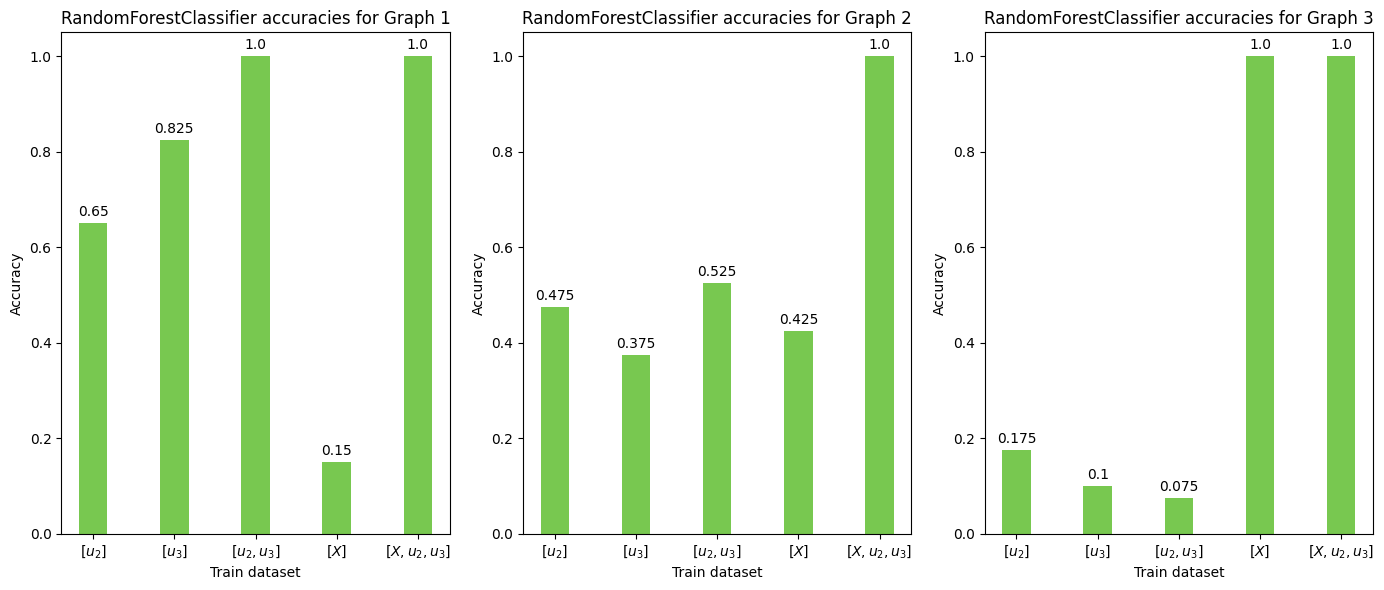

In [11]:
labels = [r"$[u_2]$", r"$[u_3]$", r"$[u_2,u_3]$", r"$[X]$", r"$[X, u_2,u_3]$"]
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
width = 0.35  # the width of the bars
x = np.arange(5)+1  # the label locations

for idx, graph_name in enumerate(graph_names):
	graph_accuracies = accuracies[idx*5:(idx+1)*5]
	rects = axs[idx].bar(x, graph_accuracies, width, color='#78C850')
	axs[idx].set_title(f"RandomForestClassifier accuracies for {graph_name}")
	axs[idx].set_xlabel("Train dataset")
	axs[idx].set_ylabel("Accuracy")
	axs[idx].set_xticks(x)
	axs[idx].set_xticklabels(labels)
	for rect in rects:
		height = rect.get_height()
		axs[idx].annotate('{}'.format(height),
					xy=(rect.get_x() + rect.get_width() / 2, height),
					xytext=(0, 3),  # 3 points vertical offset
					textcoords="offset points",
					ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Answer

In all 3 cases the best performance is offered by option 5, the dataset made of $[X, u_2,u_3]$. We can see that in 2 out of 3 cases the better accuracy is achieved when considering spectral coordinates compared to attributes but given that in the 3rd graph the spectral coordinates have very little impact it's not possible to conclude that the spectral coordinates imply higher accuracy compared to features in all cases. The accuracy plots are perfectly in line with what we were able to discover during the feature analysis step. In particular, we can see higher accuracy for either X or U when there was clear separation in the scatter plots. As for Graph 2 we can see that using both X and U allows to achieve an accuracy of almost 1 and on the other hand using only one or the other leads to an accuracy close to 0.5 since in the scatter plots we could only observe a separation into 2 regions.